In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
print("done")

done


In [1]:
# tk = th.Thicket.from_caliperreader(glob("Semester-Project/Online-Implementation/MPI/**/*.cali"))
tk = th.Thicket.from_caliperreader(glob("Semester-Project/Jace-Test/MPI-Cali/**/*.cali"))
# tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Variance time/rank", "Total time"], axis = 1)
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", "Variance time/rank"], axis = 1)
print("done")

NameError: name 'th' is not defined

In [17]:
tk.dataframe

Avg time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              30858386         4.505828   
                                                  38848341         7.314082   
                                                  42777291         1.059830   
                                                  58967990         8.149630   
                                                  62629937         5.250640   
                                                  118675343        0.445458   
                                                  128829512        5.706518   
                                                  129139726       13.040206   
                                                  137449490       11.965468   
                                                  154830362        9.071476   
                                                  183910890        7.626951   
                                                  194095211       11.057061   
                                                  231968894        4.777083   
                                                  282852072       31.895355   
                                                  302953465        4.364200   
                                                  308596346        0.705457   
                                                  328381498        5.279633   
                                                  334275661        1.114156   
                                                  339323840        4.963223   
                                                  377736252        0.612553   
                                                  388859022       14.531079   
                                                  392723596        6.771635   
                                                  396364922        5.568407   
                                                  403125061        7.070420   
                                                  442913423        4.130999   
                                                  500387476        5.402707   
                                                  502409734        5.601285   
                                                  520335073       22.032156   
                                                  563214307       21.898983   
                                                  567060458       21.948664   
                                                  590989684        7.132182   
                                                  601739377        7.886662   
                                                  602258908        6.503804   
                                                  642590778        0.418488   
                                                  678038075        5.689934   
                                                  724439303        6.373086   
                                                  753047929       13.876600   
                                                  757233851        0.297707   
                                                  789431925        6.449193   
                                                  797599488        9.486256   
                                                  825876800        9.166746   
                                                  826110719       17.151533   
                                                  857363786        6.420368   
                                                  865232578        5.836229   
                                                  881146712        6.612756   
                                                  881366928       13.106921   
                                                  886481322        3.276625   
                                                  931831277        0.745212   
                                                  948041479        1.313040   
                                 

In [18]:
gb = tk.groupby(["InputSize","InputType"])

24  thickets created...
{(65536, '1%perturbed'): <thicket.thicket.Thicket object at 0x2ac34c853df0>, (65536, 'Random'): <thicket.thicket.Thicket object at 0x2ac34bf51280>, (65536, 'Reverse Sorted'): <thicket.thicket.Thicket object at 0x2ac34c7936a0>, (65536, 'Sorted'): <thicket.thicket.Thicket object at 0x2ac34c3fe970>, (262144, '1%perturbed'): <thicket.thicket.Thicket object at 0x2ac34c1360d0>, (262144, 'Random'): <thicket.thicket.Thicket object at 0x2ac34c1ae040>, (262144, 'Reverse Sorted'): <thicket.thicket.Thicket object at 0x2ac34c3190a0>, (262144, 'Sorted'): <thicket.thicket.Thicket object at 0x2ac34c5a75b0>, (1048576, '1%perturbed'): <thicket.thicket.Thicket object at 0x2ac34c6bda60>, (1048576, 'Random'): <thicket.thicket.Thicket object at 0x2ac34c702ee0>, (1048576, 'Reverse Sorted'): <thicket.thicket.Thicket object at 0x2ac34c6bd9d0>, (1048576, 'Sorted'): <thicket.thicket.Thicket object at 0x2ac34cb66f70>, (4194304, '1%perturbed'): <thicket.thicket.Thicket object at 0x2ac34cb1a

In [19]:
# gbType = tk.groupby("InputType")
# input_types = gbType.keys()
# dfs = {}
# for key in gbType.keys():
#     thk = gbType[key]
#     gb = thk.groupby("InputSize")
#     ctk = th.Thicket.concat_thickets(
#         thickets=list(gb.values()),
#         headers=list(gb.keys()),
#         axis="columns",
#         metadata_key="num_procs"
#     )

#     ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
#     ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
#     dfs[key] = ctk

# dfs['Random'].dataframe

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [20]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [21]:
ctk.dataframe

(65536, 1%perturbed) (65536, Random)  \
                                   Avg time/rank   Avg time/rank   
name              num_procs                                        
main              2                     0.297707        0.520085   
                  4                     1.040130        0.642211   
                  8                     1.379583        1.230481   
                  16                    2.632409        6.271284   
                  32                    9.390268        7.784441   
                  64                    3.126066        5.193808   
                  128                   5.706518        5.689934   
                  256                  13.040206        6.233103   
                  512                  15.577508       10.482236   
comm              2                     0.000370        0.004898   
                  4                     0.000257        0.005379   
                  8                     0.005264        0.006293   
                  16                    0.008459        0.017344   
                  32                    0.027022        0.017783   
                  64                    0.091466        0.092942   
                  128                   0.040256        0.050696   
                  256                   0.062851        0.079426   
                  512                   0.077704        0.086480   
comm_large        2                     0.000341        0.004858   
                  4                     0.000225        0.005341   
                  8                     0.005224        0.006244   
                  16                    0.008415        0.016660   
                  32                    0.026981        0.017746   
                  64                    0.091419        0.092887   
                  128                   0.040205        0.050591   
                  256                   0.062633        0.079302   
                  512                   0.077647        0.086381   
comp              2                     0.005770        0.008446   
                  4                     0.019781        0.014396   
                  8                     0.069458        0.084268   
                  16                    0.246187        0.244134   
                  32                    1.017670        1.130886   
                  64                    1.087256        1.117530   
                  128                   1.586791        1.695183   
                  256                   3.225285        3.354869   
                  512                   6.864341        6.907542   
comp_large        2                     0.000495        0.001327   
                  4                     0.017122        0.006317   
                  8                     0.060748        0.079912   
                  16                    0.235584        0.238899   
                  32                    1.017381        1.129662   
                  64                    1.087106        1.117343   
                  128                   1.586696        1.695015   
                  256                   3.225214        3.354747   
                  512                   6.864285        6.907476   
comp_small        2                     0.005254        0.007089   
                  4                     0.002627        0.008046   
                  8                     0.008647        0.004307   
                  16                    0.010553        0.005183   
                  32                    0.000245        0.001188   
                  64                    0.000115        0.000148   
                  128                   0.000055        0.000127   
                  256                   0.000026        0.000037   
                  512                   0.000015        0.000021   
correctness_check 2                     0.000398        0.000242   
                  4                     0.000317        0.000485   
                

In [22]:
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
array_sizes1 = sorted(list(set(ctk.dataframe.columns.get_level_values(0))))

In [23]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    # plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [24]:
array_sizes = []
for pair in array_sizes1:
    array_sizes.append(pair[0])
    
array_sizes = list(set(array_sizes))

print(array_sizes)
print(function_names)

[65536, 262144, 16777216, 1048576, 4194304, 67108864]
{'correctness_check', 'comp_large', 'comm_large', 'main', 'comp_small', 'comp', 'data_init', 'comm'}


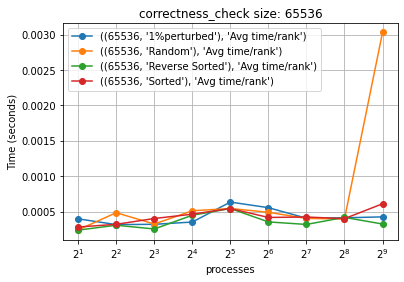

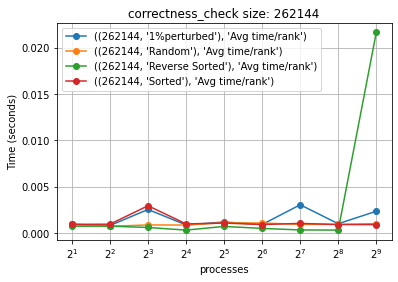

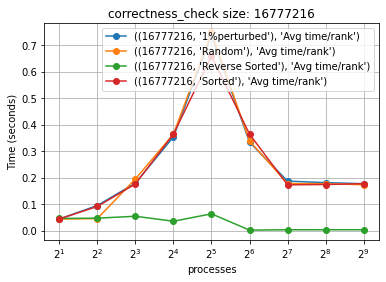

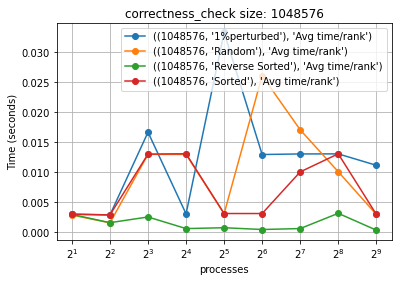

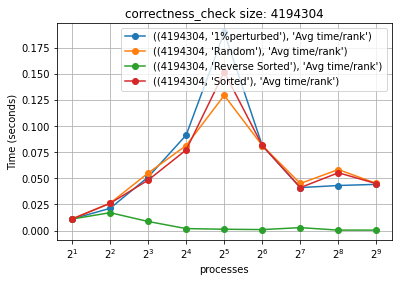

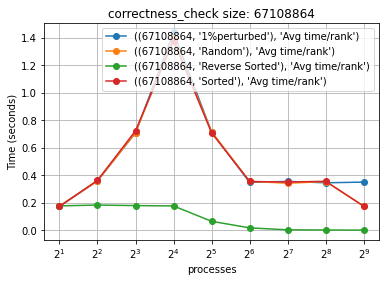

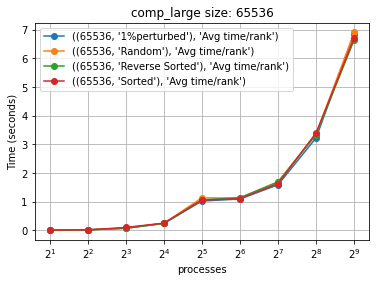

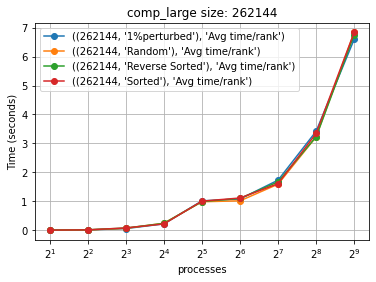

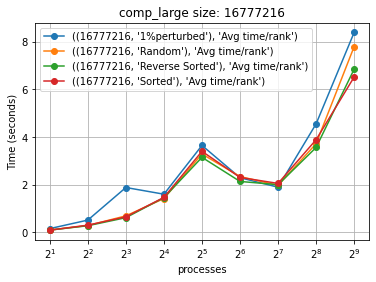

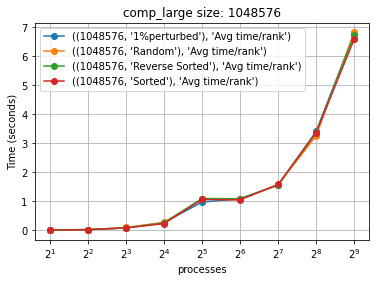

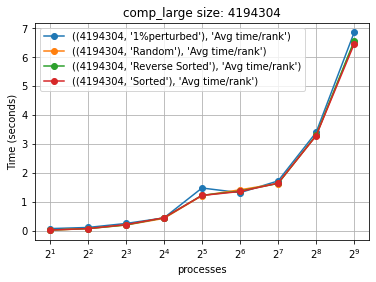

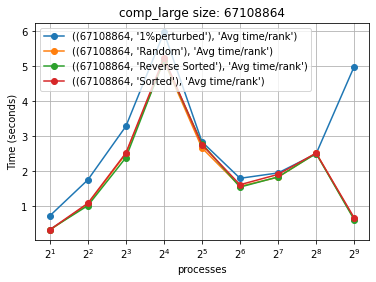

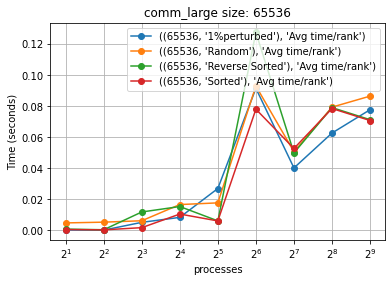

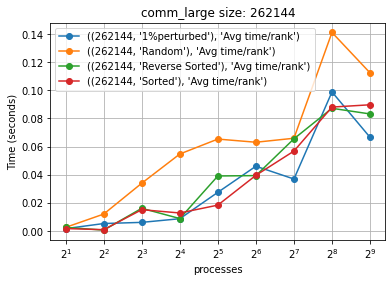

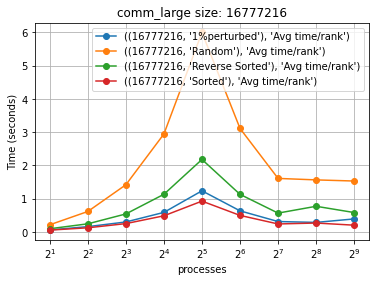

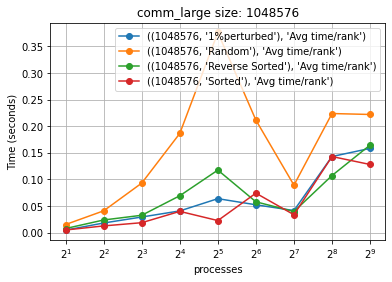

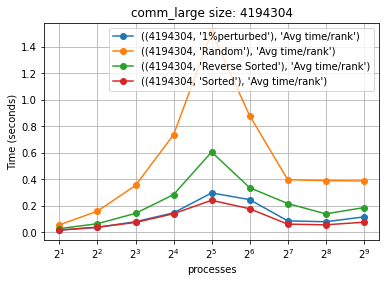

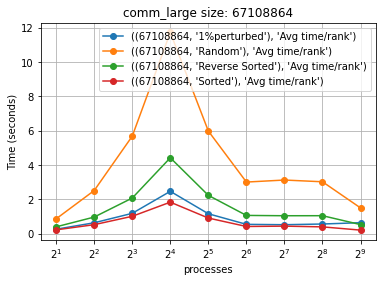

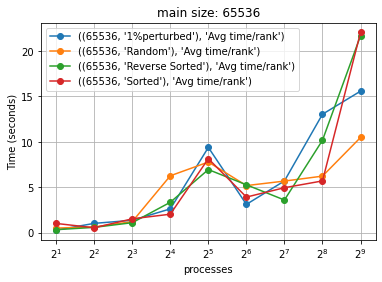

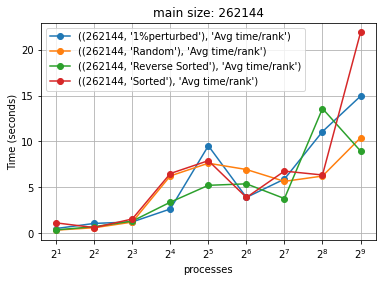

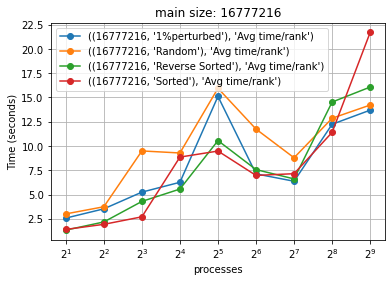

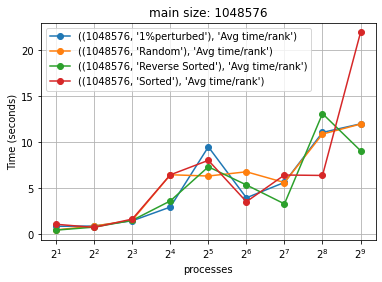

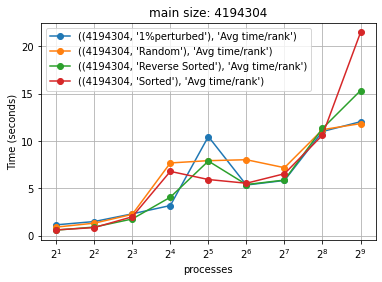

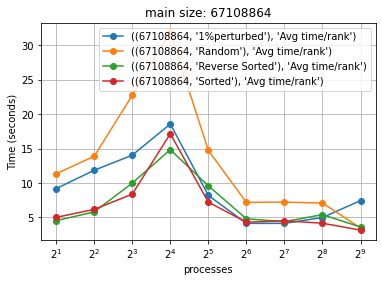

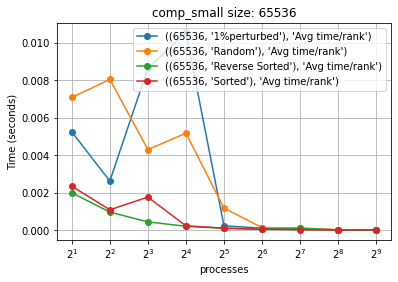

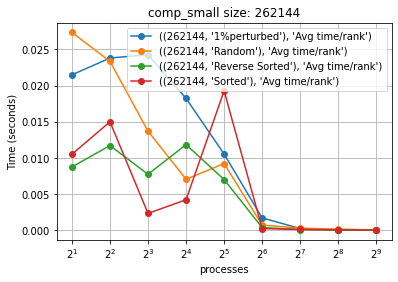

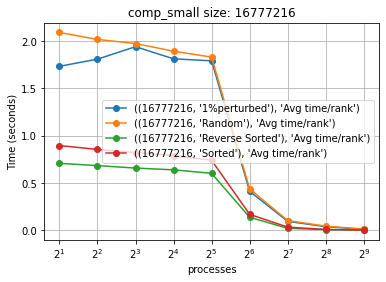

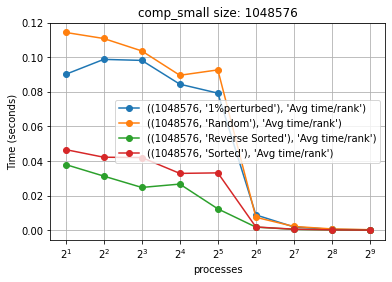

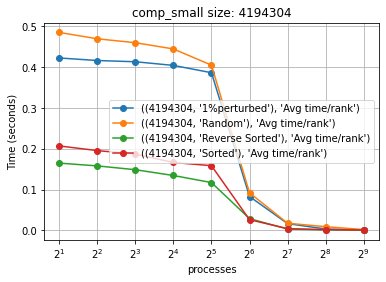

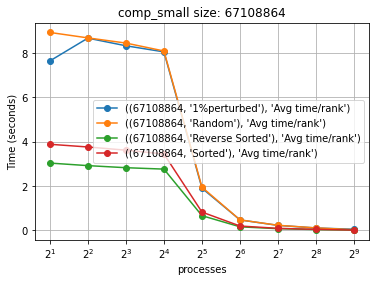

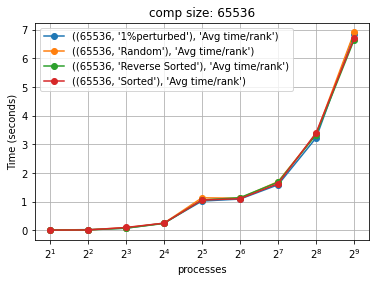

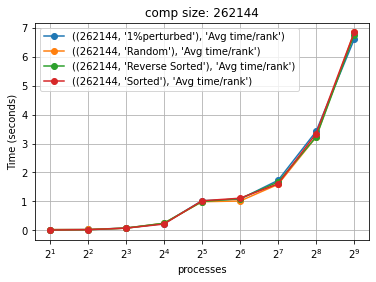

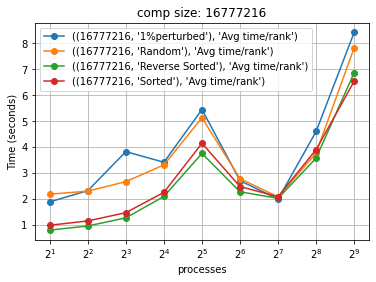

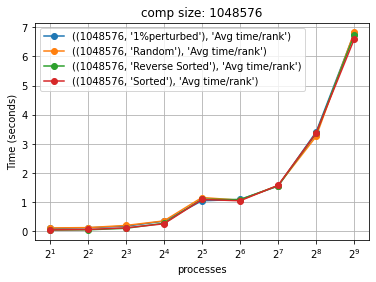

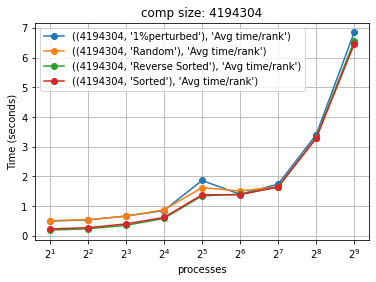

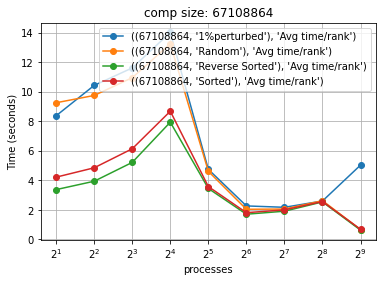

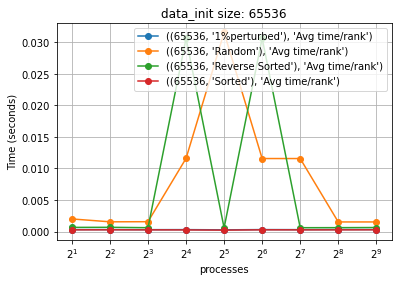

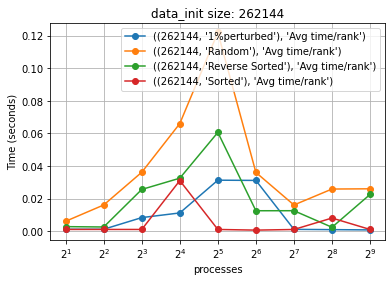

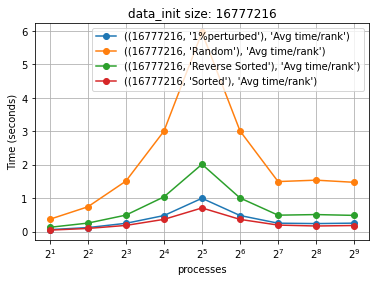

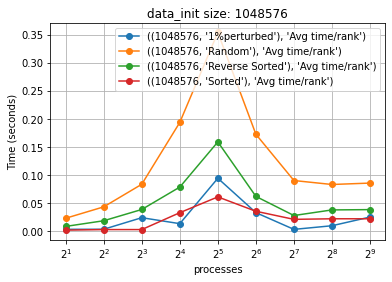

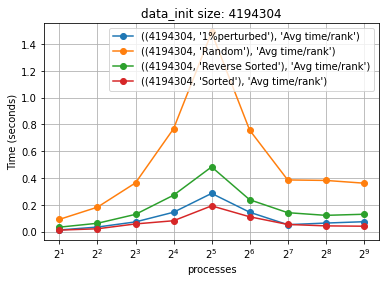

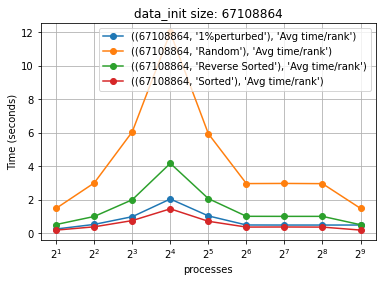

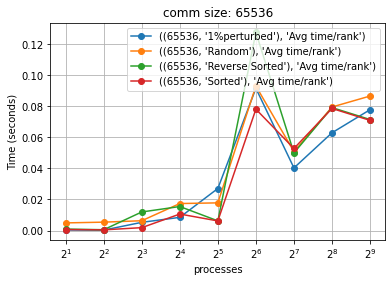

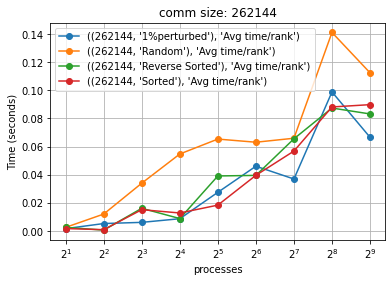

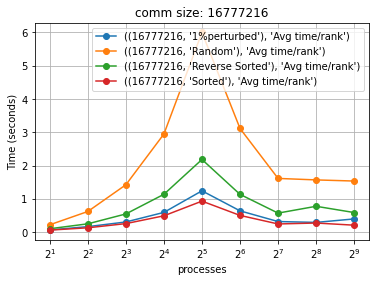

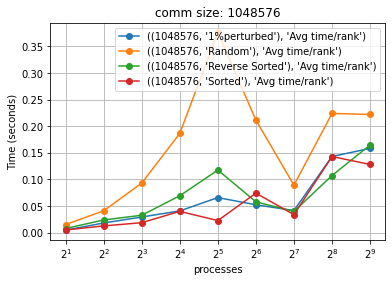

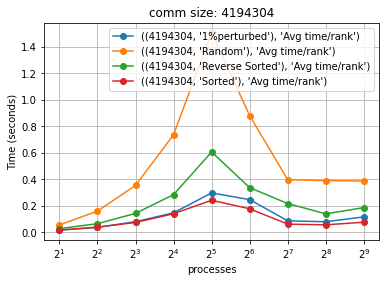

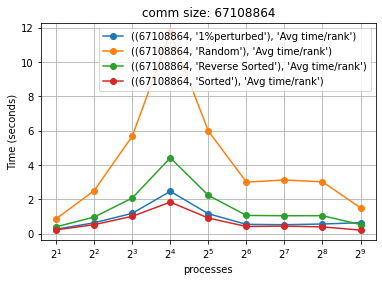

In [25]:
for name in function_names:
    for asize in array_sizes:
        tcols = [col for col in ctk.dataframe.columns if col[0][0] == asize]
        plot_mpl(
            df = ctk.dataframe.loc[name][tcols],
            title = f"{name} size: {asize}",
            xlabel = "processes",
            ylabel = "Time (seconds)"
        )

In [26]:
ctk.dataframe

(65536, 1%perturbed) (65536, Random)  \
                                   Avg time/rank   Avg time/rank   
name              num_procs                                        
main              2                     0.297707        0.520085   
                  4                     1.040130        0.642211   
                  8                     1.379583        1.230481   
                  16                    2.632409        6.271284   
                  32                    9.390268        7.784441   
                  64                    3.126066        5.193808   
                  128                   5.706518        5.689934   
                  256                  13.040206        6.233103   
                  512                  15.577508       10.482236   
comm              2                     0.000370        0.004898   
                  4                     0.000257        0.005379   
                  8                     0.005264        0.006293   
                  16                    0.008459        0.017344   
                  32                    0.027022        0.017783   
                  64                    0.091466        0.092942   
                  128                   0.040256        0.050696   
                  256                   0.062851        0.079426   
                  512                   0.077704        0.086480   
comm_large        2                     0.000341        0.004858   
                  4                     0.000225        0.005341   
                  8                     0.005224        0.006244   
                  16                    0.008415        0.016660   
                  32                    0.026981        0.017746   
                  64                    0.091419        0.092887   
                  128                   0.040205        0.050591   
                  256                   0.062633        0.079302   
                  512                   0.077647        0.086381   
comp              2                     0.005770        0.008446   
                  4                     0.019781        0.014396   
                  8                     0.069458        0.084268   
                  16                    0.246187        0.244134   
                  32                    1.017670        1.130886   
                  64                    1.087256        1.117530   
                  128                   1.586791        1.695183   
                  256                   3.225285        3.354869   
                  512                   6.864341        6.907542   
comp_large        2                     0.000495        0.001327   
                  4                     0.017122        0.006317   
                  8                     0.060748        0.079912   
                  16                    0.235584        0.238899   
                  32                    1.017381        1.129662   
                  64                    1.087106        1.117343   
                  128                   1.586696        1.695015   
                  256                   3.225214        3.354747   
                  512                   6.864285        6.907476   
comp_small        2                     0.005254        0.007089   
                  4                     0.002627        0.008046   
                  8                     0.008647        0.004307   
                  16                    0.010553        0.005183   
                  32                    0.000245        0.001188   
                  64                    0.000115        0.000148   
                  128                   0.000055        0.000127   
                  256                   0.000026        0.000037   
                  512                   0.000015        0.000021   
correctness_check 2                     0.000398        0.000242   
                  4                     0.000317        0.000485   
                

In [27]:
# ctk.dataframe.loc[[("main", 2), ("main", 8)]]
tdf = ctk.dataframe.loc[[("comp_large", i) for i in [2, 8, 32, 128, 512]], [col for col in ctk.dataframe.columns if col[0][1] == "Random"]]

In [28]:
tdf

(65536, Random) (262144, Random) (1048576, Random)  \
                       Avg time/rank    Avg time/rank     Avg time/rank   
name       num_procs                                                      
comp_large 2                0.001327         0.001892          0.006523   
           8                0.079912         0.062945          0.097494   
           32               1.129662         0.982207          1.069454   
           128              1.695015         1.589722          1.570113   
           512              6.907476         6.835589          6.818523   

                     (4194304, Random) (16777216, Random) (67108864, Random)  
                         Avg time/rank      Avg time/rank      Avg time/rank  
name       num_procs                                                          
comp_large 2                  0.021924           0.089179           0.323552  
           8                  0.196559           0.686711           2.499722  
           32                 1.212843           3.285413           2.667363  
           128                1.629811           1.967091           1.832789  
           512                6.514641           7.798570           0.642176

In [30]:
# tdf.drop(columns=[((67108864, 'Random'), 'Avg time/rank'), ((268435456, 'Random'), 'Avg time/rank')])
tdf.drop(columns=[((67108864, 'Random'), 'Avg time/rank')])
# tdf.columns

(65536, Random) (262144, Random) (1048576, Random)  \
                       Avg time/rank    Avg time/rank     Avg time/rank   
name       num_procs                                                      
comp_large 2                0.001327         0.001892          0.006523   
           8                0.079912         0.062945          0.097494   
           32               1.129662         0.982207          1.069454   
           128              1.695015         1.589722          1.570113   
           512              6.907476         6.835589          6.818523   

                     (4194304, Random) (16777216, Random)  
                         Avg time/rank      Avg time/rank  
name       num_procs                                       
comp_large 2                  0.021924           0.089179  
           8                  0.196559           0.686711  
           32                 1.212843           3.285413  
           128                1.629811           1.967091  
           512                6.514641           7.798570

In [31]:
weak = np.diag(tdf)
procs = [2, 8, 32, 128, 512]

In [38]:
def plot_weak(x, y, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        x,
        y,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend("comp_large")
    ax.set_ylim([-1, 10])
    plt.grid(True)
    # plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

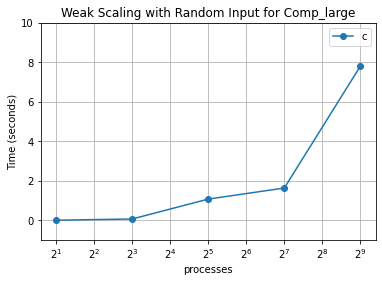

(<Figure size 432x288 with 1 Axes>,
 <Axes: title={'center': 'Weak Scaling with Random Input for Comp_large'}, xlabel='processes', ylabel='Time (seconds)'>)

In [39]:
plot_weak(procs, 
          weak,
          title = "Weak Scaling with Random Input for Comp_large",
          xlabel = "processes",
          ylabel = "Time (seconds)"
         )

In [40]:
# Gets Speedups
temp_df = ctk.dataframe.loc["main"]
temp_df = temp_df.iloc[0] / temp_df
temp_df

,"(65536, 1%perturbed)","(65536, Random)","(65536, Reverse Sorted)","(65536, Sorted)","(262144, 1%perturbed)","(262144, Random)","(262144, Reverse Sorted)","(262144, Sorted)","(1048576, 1%perturbed)","(1048576, Random)","(1048576, Reverse Sorted)","(1048576, Sorted)","(4194304, 1%perturbed)","(4194304, Random)","(4194304, Reverse Sorted)","(4194304, Sorted)","(16777216, 1%perturbed)","(16777216, Random)","(16777216, Reverse Sorted)","(16777216, Sorted)","(67108864, 1%perturbed)","(67108864, Random)","(67108864, Reverse Sorted)","(67108864, Sorted)"
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
num_procs,,,,,,,,,,,,,,,,,,,,,,,,
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.286221,0.809835,0.574470,1.851646,0.474183,0.559517,0.501811,1.847863,0.969238,0.516443,0.561569,1.479704,0.767925,0.685284,0.646556,0.713235,0.730093,0.803610,0.614141,0.729042,0.774222,0.816586,0.779713,0.812075
8,0.215795,0.422668,0.309701,0.669752,0.411259,0.273091,0.269608,0.725093,0.581477,0.298482,0.281866,0.649683,0.497197,0.402784,0.333713,0.306622,0.490862,0.316923,0.311691,0.520609,0.653140,0.498279,0.451924,0.596002
16,0.113093,0.082931,0.102709,0.503955,0.190826,0.052673,0.104806,0.172003,0.284490,0.069072,0.116319,0.163777,0.360244,0.118014,0.145010,0.090134,0.411327,0.324108,0.240371,0.159092,0.493505,0.355269,0.303784,0.290763
32,0.031704,0.066811,0.049607,0.126595,0.052732,0.043130,0.067855,0.141470,0.087915,0.070598,0.057217,0.131521,0.109562,0.114411,0.074726,0.103183,0.170547,0.188628,0.126779,0.148664,1.120596,0.769697,0.470741,0.692748
64,0.095234,0.100136,0.065356,0.262503,0.128884,0.047378,0.065826,0.287630,0.211800,0.065783,0.078385,0.300267,0.214306,0.113005,0.109082,0.110497,0.361367,0.256205,0.176742,0.202201,2.231141,1.581309,0.943217,1.164083
128,0.052170,0.091404,0.095634,0.208002,0.085231,0.058232,0.093820,0.165311,0.148501,0.079528,0.127719,0.164250,0.196640,0.126227,0.100258,0.093579,0.404416,0.342271,0.202409,0.197142,2.229849,1.572644,1.032452,1.113428
256,0.022830,0.083439,0.033897,0.180784,0.045355,0.052829,0.026038,0.176324,0.075425,0.040945,0.031929,0.165469,0.104234,0.080968,0.052009,0.057647,0.210527,0.233952,0.092112,0.123583,1.846934,1.602653,0.837285,1.207222


In [41]:
# temp = temp_df.loc[[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]][temp_df.columns[13]]
# list = []
# for i in range(1, 26, 4):
#     list.append(pd.DataFrame(temp_df.loc[[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]][temp_df.columns[i]]))

# result = pd.concat(list)
# result.groupby("num_procs")
# result
# speed_df = pd.DataFrame(list[0], list[1])
# speed_df

# for col in temp_df:
#     print(col[0][1])
    
test = temp_df.loc[[i for i in threads], [col for col in temp_df.columns if col[0][1] == "Random"]]
test

,"(65536, Random)","(262144, Random)","(1048576, Random)","(4194304, Random)","(16777216, Random)","(67108864, Random)"
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
num_procs,,,,,,
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.809835,0.559517,0.516443,0.685284,0.803610,0.816586
8,0.422668,0.273091,0.298482,0.402784,0.316923,0.498279
16,0.082931,0.052673,0.069072,0.118014,0.324108,0.355269
32,0.066811,0.043130,0.070598,0.114411,0.188628,0.769697
64,0.100136,0.047378,0.065783,0.113005,0.256205,1.581309
128,0.091404,0.058232,0.079528,0.126227,0.342271,1.572644
256,0.083439,0.052829,0.040945,0.080968,0.233952,1.602653


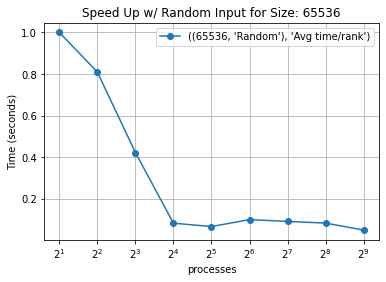

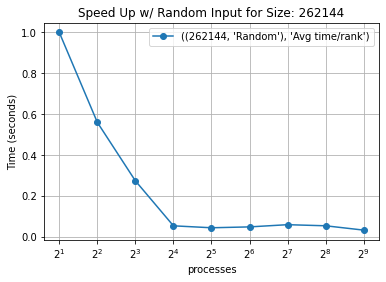

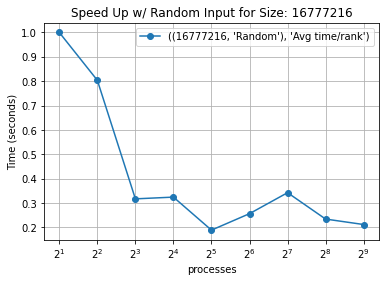

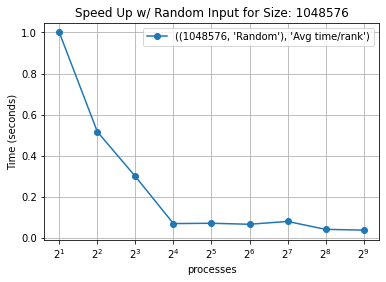

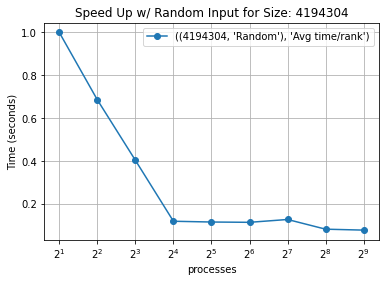

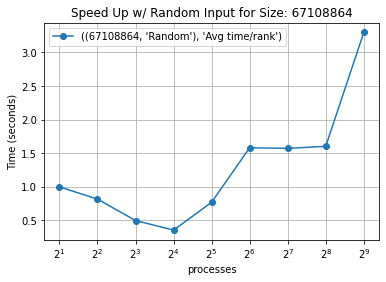

In [42]:
for asize in array_sizes:
    tcols = [col for col in test.columns if col[0][0] == asize]
#     print(tcols)
    plot_mpl(
        df = test.loc[threads][tcols],
        title = f"Speed Up w/ Random Input for Size: {asize}",
        xlabel = "processes",
        ylabel = "Time (seconds)"
    )

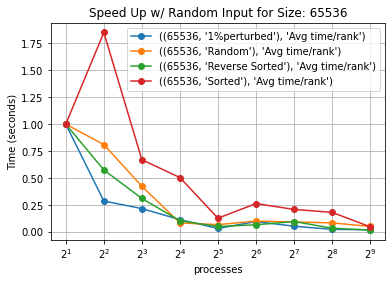

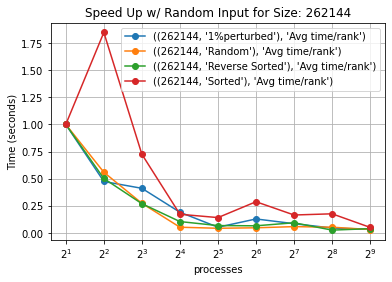

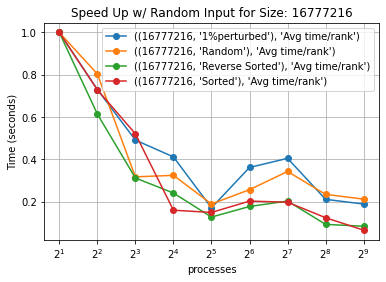

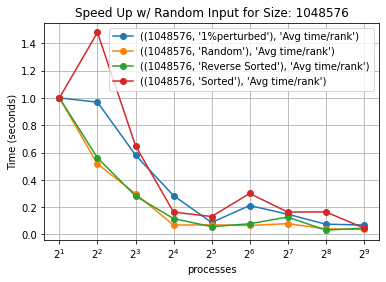

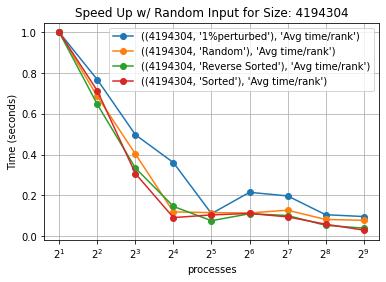

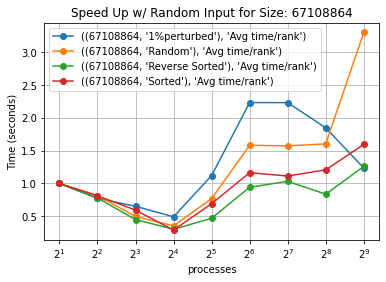

In [43]:
for asize in array_sizes:
    tcols = [col for col in temp_df.columns if col[0][0] == asize]
#     print(tcols)
    plot_mpl(
        df = temp_df.loc[threads][tcols],
        title = f"Speed Up w/ Random Input for Size: {asize}",
        xlabel = "processes",
        ylabel = "Time (seconds)"
    )